In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import os
#!pip install tqdm
#import tqdm


from mpl_toolkits import mplot3d

In [53]:
path1 = "../results/MLP_tuning_e001/"
path2 = "../results/MLP_CLAMP_e001/"
path3 = "../results/LSTM_CLAMP_e001/"
#don't forget to change path and maxT accordingly to model in for loop
model = "MLP_CLAMP"
maxT=(5,)
#maxT=(1,3,6,11,30)

epsilon=str(0.001)

lst = []
nb=0
for i in (5,10,15,30):
    for j in (1,2):
        for k in maxT:
            file = str(i) + "_" + str(j)+ "_" + str(k) + "_" + epsilon + "_Deep_Hedging_Model_" + model + "_pd.csv"
            a=pd.read_csv(path2+file).transpose()
            lst.append(a)
            nb+=1
a = pd.concat(lst)

In [54]:
price_diff = np.zeros(nb)
var = np.zeros(nb)
Cvar99 = np.zeros(nb)
predicted_price_diff = np.zeros(nb)
for i in range(1, 2*nb, 2):
    #print(a.iloc[i,19], a.iloc[i,15])
    price_diff[np.int((i-1)/2)] = np.abs(np.double(a.iloc[i,15])) - np.double(a.iloc[i,19])
    var[np.int((i-1)/2)] = (np.double(a.iloc[i,16]))
    Cvar99[np.int((i-1)/2)] = (np.double(a.iloc[i,5]))
    predicted_price_diff[np.int((i-1)/2)] = np.abs(np.double(a.iloc[i,17])) - np.double(a.iloc[i,19])

<ipython-input-54-24aa847969d1>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  price_diff[np.int((i-1)/2)] = np.abs(np.double(a.iloc[i,15])) - np.double(a.iloc[i,19])
<ipython-input-54-24aa847969d1>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

In [55]:
filename=[]
for i in (5,10,15,30):
    for j in (1,2):
        for k in maxT:
            filename.append(str(i)+"_"+str(j)+"_"+str(k))#str(i) + "_" + str(j)+ "_" + str(k) + "_0.0_Deep_Hedging_Model_" + model + "_pd.csv")

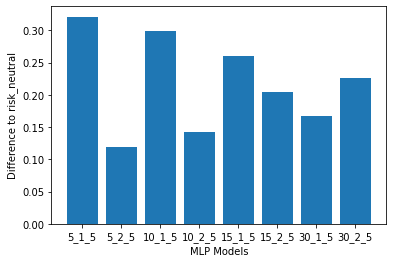

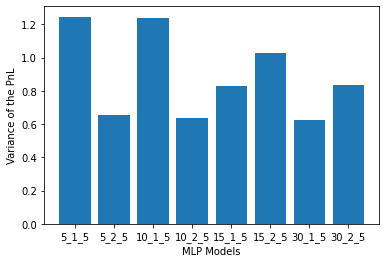

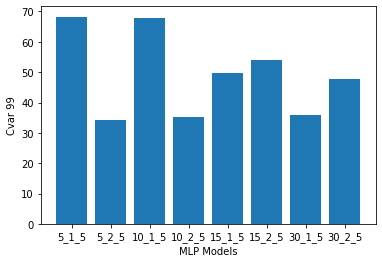

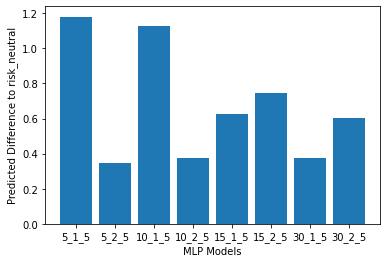

In [56]:
x=np.arange(nb)

#Case to display all the histograms and their name in a readable way
if len(maxT)==1:
    plt.figure() 
    plt.ylabel('Difference to risk_neutral')
    plt.xlabel('MLP Models')
    plt.bar(x, price_diff)
    plt.xticks(x, filename)

    plt.figure()
    plt.ylabel('Variance of the PnL')
    plt.xlabel('MLP Models')
    plt.bar(x, var)
    plt.xticks(x, filename)

    plt.figure()
    plt.ylabel('Cvar 99')
    plt.xlabel('MLP Models')
    plt.bar(x, Cvar99)
    plt.xticks(x, filename)

    plt.figure()
    plt.ylabel('Predicted Difference to risk_neutral')
    plt.xlabel('MLP Models')
    plt.bar(x, predicted_price_diff)
    plt.xticks(x, filename)
    plt.show()
else:
    plt.figure(figsize=(45, 10), dpi=80) 
    plt.ylabel('Difference to risk_neutral')
    plt.xlabel('MLP Models')
    plt.bar(x, price_diff)
    plt.xticks(x, filename)

    plt.figure(figsize=(45, 10), dpi=80)
    plt.ylabel('Variance of the PnL')
    plt.xlabel('MLP Models')
    plt.bar(x, var)
    plt.xticks(x, filename)

    plt.figure(figsize=(45, 10), dpi=80)
    plt.ylabel('Cvar 99')
    plt.xlabel('MLP Models')
    plt.bar(x, Cvar99)
    plt.xticks(x, filename)

    plt.figure(figsize=(45, 10), dpi=80)
    plt.ylabel('Predicted Difference to risk_neutral')
    plt.xlabel('MLP Models')
    plt.bar(x, predicted_price_diff)
    plt.xticks(x, filename)
    plt.show()

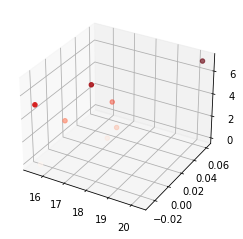

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = x
xdata = Cvar99
ydata = price_diff
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

In [45]:
#Select Best params for each model and then compare models#
sel_file1 = "30_1_5_0.001_Deep_Hedging_Model_MLP_var.csv"
sel_file2 = "5_2_5_0.001_Deep_Hedging_Model_MLP_CLAMP_var.csv"
sel_file3 = "30_1_11_0.001_Deep_Hedging_Model_LSTM_CLAMP_var.csv"

val1=pd.read_csv(path1+sel_file1).transpose()
val2=pd.read_csv(path2+sel_file2).transpose()
val3=pd.read_csv(path3+sel_file3).transpose()

bar1 =np.double(val1.iloc[1,:])
bar2 =np.double(val2.iloc[1,:])
bar3 =np.double(val3.iloc[1,:])

mean1 = bar1.mean()
mean2 = bar2.mean()
mean3= bar3.mean()

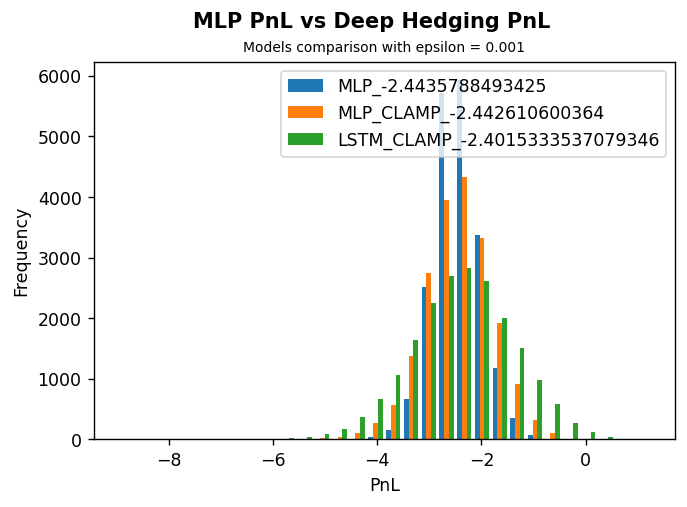

In [60]:
#bar =np.double(val.iloc[1,:])
# Plot Black-Scholes PnL and Deep Hedging PnL (with BS_price charged on both).
fig_PnL = plt.figure(dpi=125, facecolor='w')
fig_PnL.suptitle("MLP PnL vs Deep Hedging PnL \n",
                     fontweight="bold")
ax = fig_PnL.add_subplot()
ax.set_title("Models comparison with epsilon = " + str(epsilon),
                 fontsize=8)
ax.set_xlabel("PnL")
ax.set_ylabel("Frequency")
ax.hist((bar1,bar2,bar3), bins=30,
            label=["MLP_"+str(mean1), "MLP_CLAMP_"+str(mean2), "LSTM_CLAMP_"+str(mean3)])
ax.legend()

